In [4]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Define the two equities from FTSE 100
symbols = ['LLOY.L', 'HSBA.L'] # Example symbols: Lloyds (LLOY.L) and HSBC (HSBA.L)
start_date = '2021-11-09'
end_date = '2023-11-09'

In [10]:
# Download historical daily data
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [11]:
print(data.head())

Ticker                         HSBA.L     LLOY.L
Date                                            
2021-11-09 00:00:00+00:00  343.921448  41.442097
2021-11-10 00:00:00+00:00  345.201996  42.213032
2021-11-11 00:00:00+00:00  347.002899  42.726990
2021-11-12 00:00:00+00:00  347.523132  42.170200
2021-11-15 00:00:00+00:00  349.524078  42.512840


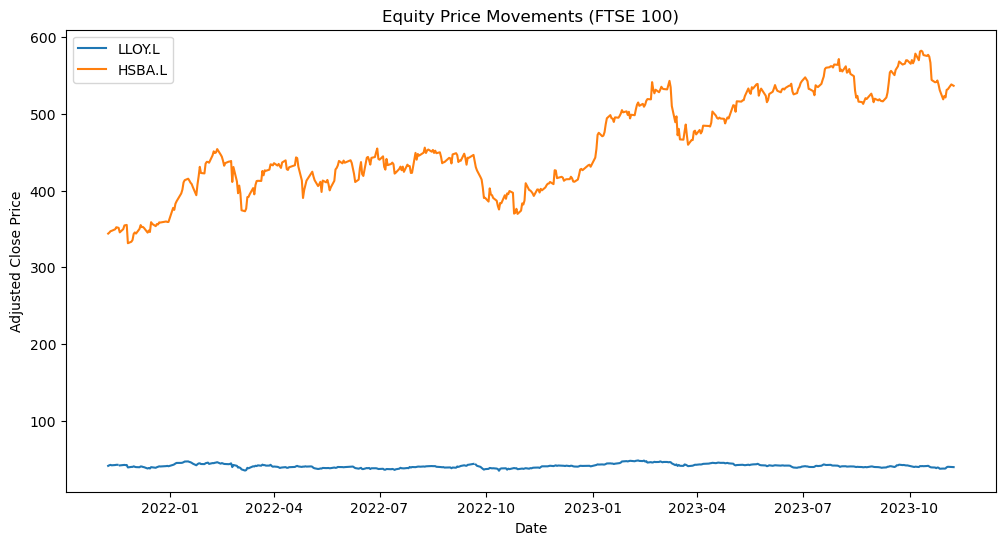

In [12]:
# Plot the movements of the equity prices over the time period
plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(data[symbol], label=symbol)

plt.title("Equity Price Movements (FTSE 100)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

In [13]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

C:\Users\raksh\AppData\Local\Temp\ipykernel_22248\2915081408.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


In [14]:
# Calculate annualised average returns and standard deviations
trading_days = 252  # Typical number of trading days in a year
annualised_avg_returns = daily_returns.mean() * trading_days
annualised_std_devs = daily_returns.std() * np.sqrt(trading_days)

In [15]:
# Print results
results = pd.DataFrame({
    "Annualised Average Return": annualised_avg_returns,
    "Annualised Standard Deviation": annualised_std_devs
})

print("\nAnnualised Metrics:")
print(results)
# - The annualised average return represents the compounded growth rate over the year.
# - The annualised standard deviation represents the risk (volatility) of the equity.
# - Equities with higher returns and lower standard deviations are generally more attractive.


Annualised Metrics:
        Annualised Average Return  Annualised Standard Deviation
Ticker                                                          
HSBA.L                   0.258082                       0.263968
LLOY.L                   0.023204                       0.293819
